In [42]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd

In [44]:
city_distances = pd.read_csv('distances.csv')
city_distances.set_index('Unnamed: 0', inplace=True)
city_distances.index.name = None
city_distances.columns

Index(['Ahvaz', 'Arak', 'Ardabil', 'Bandar Abbas', 'Birjand', 'Bojnord',
       'Bushehr', 'Gorgan', 'Hamadan', 'Ilam', 'Isfahan', 'Karaj', 'Kerman',
       'Kermanshah', 'Khorramabad', 'Mashhad', 'Qazvin', 'Qom', 'Rasht',
       'Sanandaj', 'Sari', 'Semnan', 'Shahr-e Kord', 'Shiraz', 'Tabriz',
       'Tehran', 'Urmia', 'Yasuj', 'Yazd', 'Zahedan', 'Zanjan'],
      dtype='object')

In [45]:
def MDS_ (city_distances, k):
    A = np.asarray(city_distances)
    Atild = np.power(A, 2)
    n, _ = A.shape
    e = np.ones((n,1))
    L = np.subtract(np.identity(n), 1/n*(np.dot(e, e.T)))
    B = -1/2 * np.dot(np.dot(L, Atild), L)

    vals, vecs = np.linalg.eig(B)
    vecs = vecs[:,np.argsort(vals)]
    vals = vals[np.argsort(vals)]

    non_negative_vals_square_root = np.power(vals, 1/2)

    landa = np.zeros((k, k))
    np.fill_diagonal(landa, non_negative_vals_square_root[-k:])
    X = np.dot(vecs[:, -k:], landa)

    return(X)

In [46]:
def rotate(degree, X):

    theta = np.radians(degree)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))

    for i in range(X.shape[0]):
        X[i] = np.dot(R, X[i])
    
    return X

In [47]:
X = MDS_(city_distances, 2)
X

array([[ 411.59119625,  -58.46928209],
       [ 103.70343829, -148.71128703],
       [-219.19692337, -502.49592155],
       [ 374.19212599,  805.41306006],
       [-301.19749984,  647.46648569],
       [-600.31593748,  197.86366104],
       [ 524.38735284,  257.89239153],
       [-389.60202585,   34.29751462],
       [  95.5617012 , -281.8223733 ],
       [ 306.12651121, -377.06298992],
       [ 132.59364438,   93.68995576],
       [-120.87292647, -154.84636919],
       [  51.36066725,  662.26022859],
       [ 209.78877217, -364.91139329],
       [ 226.52549021, -215.85705956],
       [-620.33553647,  438.43880522],
       [-114.4759829 , -257.46609069],
       [  -8.71931665,  -91.71904352],
       [-188.89706913, -348.47846642],
       [ 119.03664931, -432.05876135],
       [-294.97652525,  -49.10991328],
       [-222.14337853,   38.25249794],
       [ 207.77552901,   49.66677703],
       [ 368.81114716,  350.95396995],
       [-110.30074442, -642.6723221 ],
       [-131.79183385, -1

In [48]:
X[: ,0] = X[: ,0] * -1
X[: ,1] = X[: ,1] * -1
X = rotate(45, X)

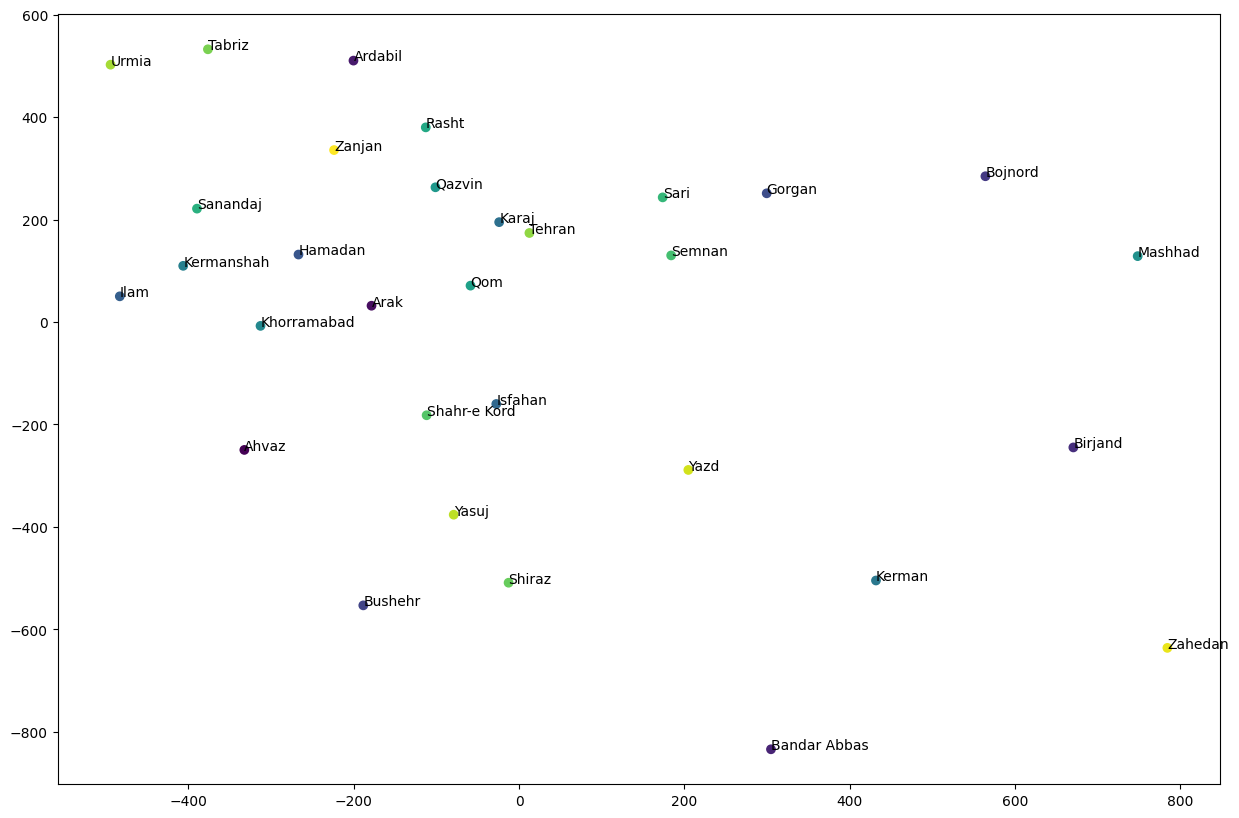

In [49]:
import matplotlib.pyplot as plt

x = np.squeeze(np.asarray(X[:, 0]))
y = np.squeeze(np.asarray(X[:, 1]))


plt.figure(figsize=(15, 10))
plt.scatter(x, y, c=range(31), )
for i, txt in enumerate(city_distances.columns):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

In [50]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import floyd_warshall

def find_geodesic_distance(city_distances, num):

    knn = kneighbors_graph(city_distances, num, mode='distance', include_self='auto')
    print(knn)
    dist_matrix = floyd_warshall(csgraph=knn, directed=False)

    return(dist_matrix)

In [51]:
dist_matrix = find_geodesic_distance(city_distances, 4)
X = MDS_(dist_matrix, 2)
X

  (0, 22)	835.4729199680861
  (0, 14)	991.0575159898642
  (0, 27)	1000.0594982299804
  (0, 10)	1073.5180482879643
  (1, 17)	478.3178859294308
  (1, 14)	540.0731431945121
  (1, 8)	563.3276133831893
  (1, 11)	815.9381103980865
  (2, 24)	647.8201911024386
  (2, 18)	725.7079302308885
  (2, 30)	746.6197157857539
  (2, 26)	983.1927583134449
  (3, 12)	1280.762663415826
  (3, 29)	1306.8416124381715
  (3, 4)	1762.934201835111
  (3, 23)	2090.2045354462325
  (4, 12)	978.8278704654869
  (4, 15)	1069.6485404094187
  (4, 5)	1597.7675049893837
  (4, 29)	1667.4681406251814
  (5, 15)	917.6922141982027
  (5, 7)	1264.9774701551012
  (5, 4)	1597.7675049893837
  (5, 20)	1786.8662512902301
  (6, 23)	567.412548327934
  :	:
  (24, 19)	1213.5765324032927
  (25, 11)	180.5353151048293
  (25, 17)	475.4723966751382
  (25, 16)	604.5188169114341
  (25, 20)	735.9599173868098
  (26, 24)	382.9529997271206
  (26, 2)	983.1927583134449
  (26, 19)	1341.1498797673585
  (26, 30)	1462.1090930570126
  (27, 23)	686.230282048234

array([[-1822.19563887,    18.53623196],
       [ -329.57508227,   771.0196077 ],
       [  806.44437268,  2488.46718081],
       [-1116.70519284, -3824.69599459],
       [  965.04494648, -3542.20478761],
       [ 2712.29419479, -1565.47645516],
       [-1984.97656324, -1298.90985127],
       [ 2148.01536231,  -200.1918537 ],
       [ -590.06297196,  1314.13971455],
       [-1057.90802269,  1730.15794273],
       [ -877.00136667,  -128.98455897],
       [  691.03384189,   874.04656499],
       [ -609.95529484, -3081.31327776],
       [ -974.0918781 ,  1639.5756591 ],
       [ -808.92065583,   979.41076053],
       [ 2234.30418017, -2651.83857681],
       [  662.08914936,  1266.83668558],
       [  112.44581123,   682.72389936],
       [  756.37769291,  1752.46017206],
       [ -536.9764719 ,  1957.64599757],
       [ 1630.01435182,   320.09471054],
       [ 1633.25219654,   385.09699975],
       [-1175.47640771,   -81.52643461],
       [-1576.78970071, -1580.53930322],
       [  127.42

In [52]:
X = rotate(45, X)

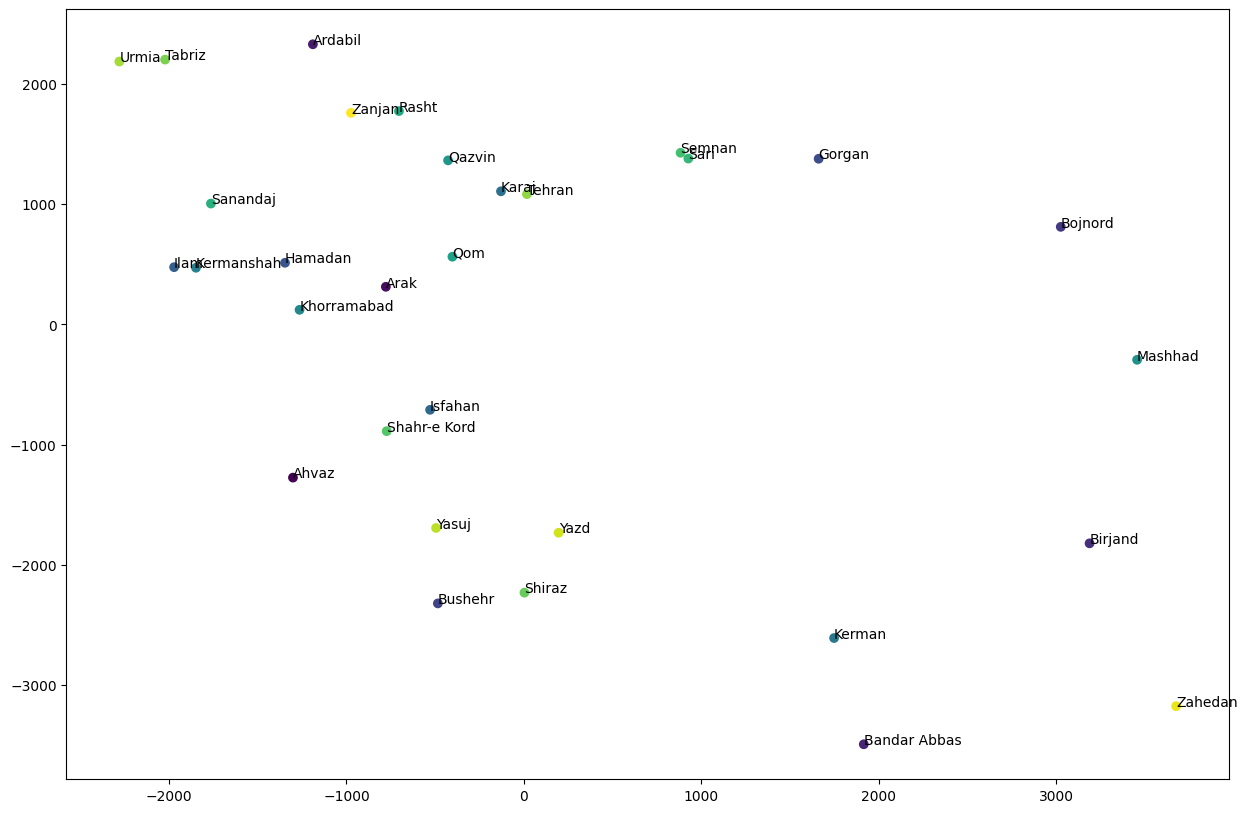

In [53]:
import matplotlib.pyplot as plt

x = np.squeeze(np.asarray(X[:, 0]))
y = np.squeeze(np.asarray(X[:, 1]))


plt.figure(figsize=(15, 10))
plt.scatter(x, y, c=range(31), )
for i, txt in enumerate(city_distances.columns):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

In [54]:
from sklearn.manifold import Isomap
embedding = Isomap(n_neighbors=4, n_components=2)
X_transformed = embedding.fit_transform(city_distances)
X_transformed

array([[  -18.53623196, -1822.19563887],
       [ -771.0196077 ,  -329.57508227],
       [-2488.46718081,   806.44437268],
       [ 3824.69599459, -1116.70519284],
       [ 3542.20478761,   965.04494648],
       [ 1565.47645516,  2712.29419479],
       [ 1298.90985127, -1984.97656324],
       [  200.1918537 ,  2148.01536231],
       [-1314.13971455,  -590.06297196],
       [-1730.15794273, -1057.90802269],
       [  128.98455897,  -877.00136667],
       [ -874.04656499,   691.03384189],
       [ 3081.31327776,  -609.95529484],
       [-1639.5756591 ,  -974.0918781 ],
       [ -979.41076053,  -808.92065583],
       [ 2651.83857681,  2234.30418017],
       [-1266.83668558,   662.08914936],
       [ -682.72389936,   112.44581123],
       [-1752.46017206,   756.37769291],
       [-1957.64599757,  -536.9764719 ],
       [ -320.09471054,  1630.01435182],
       [ -385.09699975,  1633.25219654],
       [   81.52643461, -1175.47640771],
       [ 1580.53930322, -1576.78970071],
       [-2987.35

In [55]:
X_transformed = rotate(-45, X_transformed)

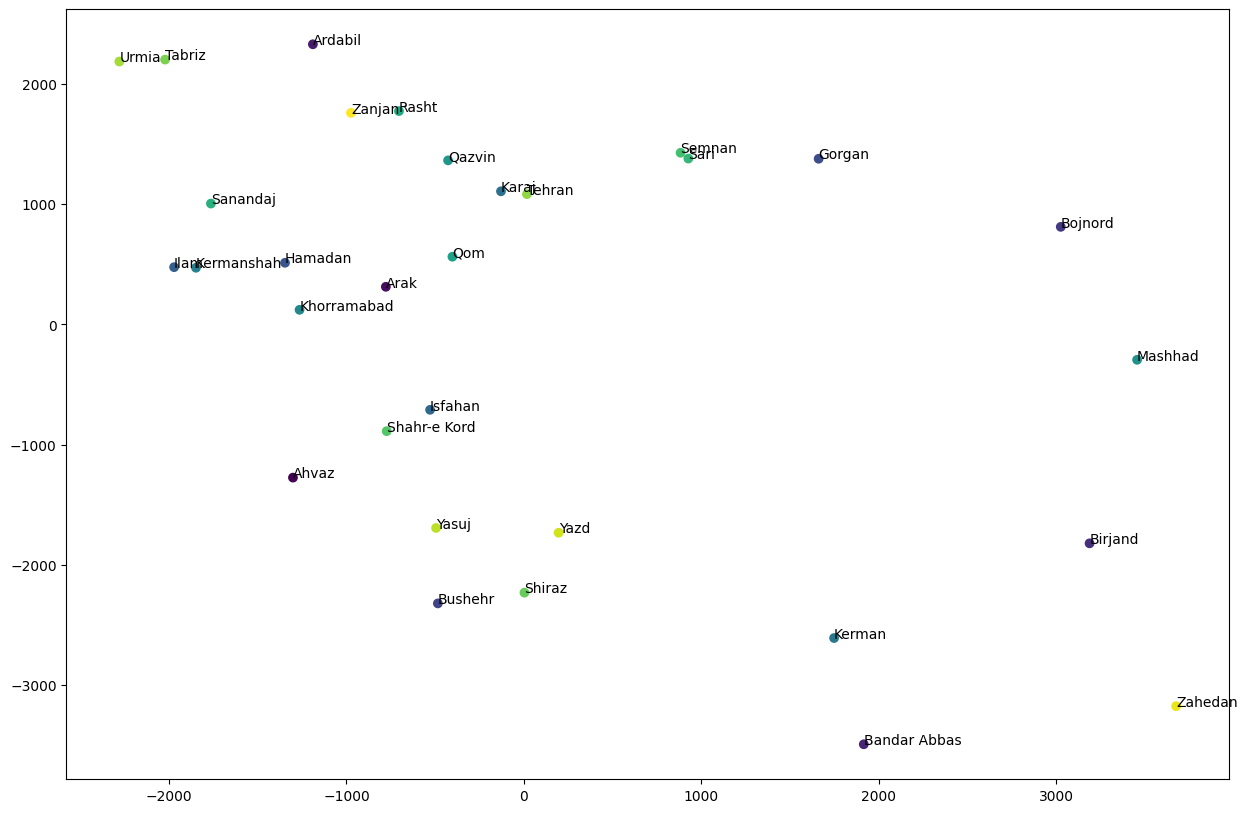

In [56]:
import matplotlib.pyplot as plt

x = np.squeeze(np.asarray(X_transformed[:, 0]))
y = np.squeeze(np.asarray(X_transformed[:, 1]))


plt.figure(figsize=(15, 10))
plt.scatter(x, y, c=range(31), )
for i, txt in enumerate(city_distances.columns):
    plt.annotate(txt, (x[i], y[i]))
plt.show()